# Outlier Detection Using Unsupervised Machine Learning on Non-Time Series Data

## Introduction to Anomaly Detection with PyOD

Welcome to this hands-on lab on **anomaly detection** using the **Python Outlier Detection (PyOD)** library. This notebook will guide you through various machine learning-based approaches to detect anomalies in **non-time series data**.

### What is Anomaly Detection?

**Anomaly detection** (also called outlier detection) is the process of identifying data points, events, or observations that deviate significantly from the majority of the data. Unlike statistical methods that rely on simple thresholds and distributions, machine learning approaches can:

- Handle **high-dimensional data** with multiple features
- Detect **complex patterns** that simple statistics might miss
- Learn **contextual relationships** between features
- Adapt to **non-linear patterns** in the data

### Types of Anomalies

1. **Point Anomalies**: Individual data points that are anomalous (e.g., an unusually tall person for a given weight)
2. **Contextual Anomalies**: Data points that are anomalous in a specific context (e.g., a height that's unusual for a specific gender)
3. **Collective Anomalies**: A collection of related data points that are anomalous together

### About PyOD

PyOD (Python Outlier Detection) is a comprehensive Python toolkit for detecting outliers in multivariate data. It provides:
- **30+ algorithms** from different families (statistical, proximity-based, clustering, neural networks)
- A **unified API** similar to scikit-learn
- **Scalable** implementations for large datasets
- Tools for **model evaluation and comparison**

### Why Non-Time Series Data?

This notebook demonstrates that PyOD algorithms are **not limited to time series data**. We'll use a **weight-height dataset** to show how these techniques apply to any tabular data where you need to identify unusual observations.

In this lab, we'll explore algorithms from different families and learn when to use each approach.

# Technical Requirements

Before we begin, let's verify that we have all the necessary libraries installed. These libraries form the foundation of our anomaly detection toolkit.

In [2]:
!uv pip install pyod

Using Python 3.11.13 environment at: /Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/deep
Resolved 18 packages in 633ms                                        
Installed 3 packages in 23ms                                
 + llvmlite==0.45.1
 + numba==0.62.1
 + pyod==2.0.5


In [13]:
import matplotlib 
import pandas as pd
import pyod 
import statsmodels

print(f'''
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
''')


Matplotlib -> 3.10.7
pandas -> 2.3.3   



In [14]:
from pyod import version
version.__version__

'2.0.5'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


plt.rcParams["figure.figsize"] = [12, 5]

## Dataset: Weight-Height Data

We'll use a weight-height dataset, which contains measurements of individuals' weight and height. This is an excellent dataset for learning anomaly detection on non-time series data because:

- It has **clear expected relationships** (correlation between height and weight)
- It contains **potential outliers** (unusual measurements, data entry errors)
- It's a **real-world use case** (anomaly detection in health/biometric data)
- It demonstrates that PyOD works on **any tabular data**, not just time series

The dataset contains measurements for individuals, including gender, height (in inches), and weight (in pounds).

In [16]:
file = Path("data/weight-height.csv")
wh = pd.read_csv(file)
wh

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Detecting Outliers Using Distance-Based Algorithms (PyOD)

## What are Distance-Based Algorithms?

Distance-based algorithms identify anomalies by measuring how **far** data points are from their neighbors. The intuition is simple:

- **Normal points** are surrounded by many neighbors (they're in dense regions)
- **Anomalous points** are isolated and far from other points (they're in sparse regions)

These algorithms work well when anomalies are in low-density regions of the feature space.

---

## Algorithm 1: K-Nearest Neighbors (KNN)

### How KNN Works for Anomaly Detection

The **KNN algorithm** identifies outliers based on the distance to their k-nearest neighbors:

1. **For each data point**, find its k closest neighbors
2. **Calculate a distance metric** (e.g., mean, median, or largest distance to the k neighbors)
3. **Assign an anomaly score** based on this distance
4. **Points with large distances** to their neighbors are considered outliers

**Key Hyperparameters:**
- `n_neighbors` (k): How many neighbors to consider (default: 5)
- `method`: How to aggregate distances ('mean', 'median', 'largest')
- `contamination`: Expected proportion of outliers in the data (e.g., 0.005 = 0.5%)

**When to use KNN:**
- ✅ Simple to understand and interpret
- ✅ Works well when outliers are far from normal points
- ❌ Computationally expensive for large datasets
- ❌ Sensitive to the choice of k

---

## Algorithm 2: Local Outlier Factor (LOF)

### How LOF Works for Anomaly Detection

**LOF** is an improvement over KNN that considers **local density** rather than just distance:

1. **Calculate local density** for each point based on distances to its k neighbors
2. **Compare each point's density** to the density of its neighbors
3. **Compute LOF score**: Ratio of the point's density to its neighbors' average density
4. **Points in low-density regions** relative to their neighbors are outliers

**Key Differences from KNN:**
- LOF considers **relative density** (compares local densities)
- KNN uses **absolute distance** (compares distances directly)
- LOF handles **varying density regions** better than KNN

**Key Hyperparameters:**
- `n_neighbors`: Number of neighbors to use for density estimation (default: 20)
- `contamination`: Expected proportion of outliers

**When to use LOF:**
- ✅ Data has **clusters with different densities**
- ✅ Need to detect **local** anomalies (outliers within a cluster)
- ✅ More robust than KNN for complex data distributions
- ❌ Still computationally expensive for very large datasets

---

Let's apply both algorithms to detect outliers in our weight-height data!

In [17]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF

## Detecting Point Outliers

In this section, we apply KNN and LOF to detect **point anomalies** - individual observations that have unusual values compared to other observations in the dataset. We'll start by analyzing height measurements to identify unusually tall or short individuals.

In [18]:
knn = KNN(contamination=0.005,
          method='mean',
          n_neighbors=5)
print(knn)

KNN(algorithm='auto', contamination=0.005, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)


In [19]:
lof = LOF(contamination=0.005, 
          n_neighbors=20) 
print(lof)

LOF(algorithm='auto', contamination=0.005, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)


In [20]:
knn.fit(wh[['Height']])
lof.fit(wh[['Height']])

LOF(algorithm='auto', contamination=0.005, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [21]:
knn_pred = pd.Series(knn.predict(wh[['Height']]))

lof_pred = pd.Series(lof.predict(wh[['Height']]))

In [22]:
print('Number of KNN outliers = ', knn_pred.sum())
print('Number of LOF outliers = ', lof_pred.sum())

Number of KNN outliers =  28
Number of LOF outliers =  42


# Detecting Outliers Using Clustering-Based Algorithms (PyOD)

## What are Clustering-Based Algorithms?

Clustering-based algorithms use a different intuition than distance-based methods:

**Core Idea**: 
- First, **group similar data points** into clusters
- Then, identify points that **don't fit well** into any cluster
- Points far from cluster centers or in small/sparse clusters are anomalies

**Advantage over distance-based methods**:
- Can handle **complex data distributions** with multiple modes
- More efficient for **large datasets** (cluster first, then evaluate)
- Can detect anomalies as **points between clusters**

---

## Algorithm: Cluster-Based Local Outlier Factor (CBLOF)

### How CBLOF Works

CBLOF combines clustering with outlier scoring:

1. **Clustering Phase**: 
   - Apply clustering (e.g., K-means) to partition the data into `n_clusters` groups
   - Classify clusters as **large** (many points) or **small** (few points)

2. **Outlier Scoring**:
   - For points in **large clusters**: Score based on distance to cluster center
   - For points in **small clusters**: Score based on distance to nearest large cluster
   - Intuition: Small clusters are likely to contain outliers

3. **Final Score Calculation**:
   - Uses `alpha` and `beta` parameters to weight the contribution
   - `alpha`: Threshold to classify clusters as large vs. small (default: 0.9)
   - `beta`: Weight factor for small cluster penalty (default: 5)

### Key Hyperparameters

- **`n_clusters`**: Number of clusters to create
  - Too few: Might group anomalies with normal points
  - Too many: Normal points might form small clusters
  
- **`contamination`**: Expected proportion of outliers (e.g., 0.001 = 0.1%)

- **`alpha`**: Ratio to determine large vs. small clusters
  - Default 0.9 means: clusters with > 90% of average cluster size are "large"
  
- **`beta`**: Penalty multiplier for small clusters
  - Higher values = stronger penalty for points in small clusters

### When to Use CBLOF

- ✅ Data has **natural groupings** or clusters
- ✅ Need better **scalability** than pure distance-based methods
- ✅ Outliers are likely to be **isolated** or in sparse regions
- ❌ Need to choose the number of clusters (requires domain knowledge)
- ❌ Less effective if data doesn't have clear cluster structure

Let's see how CBLOF performs on our weight-height data!

In [23]:
from pyod.models.cblof import CBLOF

In [24]:
cblof = CBLOF(n_clusters=8, 
              contamination=0.001,
              alpha=0.9,
              beta=5)
cblof

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.001, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [25]:
cblof.fit(wh[['Height']])

cblof.predict(wh[['Height']]).sum()

np.int64(10)

# Detecting Outliers Using Probabilistic and Statistical Algorithms

## What are Probabilistic Algorithms?

Unlike distance or clustering methods, probabilistic algorithms model the **probability distribution** of the data:

**Core Idea**:
- Learn the **joint probability distribution** of all features
- Calculate how **probable** each data point is under this distribution
- Points with **low probability** are considered anomalies

**Advantages**:
- ✅ Theoretically grounded in **statistics and probability theory**
- ✅ Can handle **dependencies between features** 
- ✅ Often **parameter-free** or require minimal tuning
- ✅ Fast prediction after training

---

## Algorithm 1: COPOD (Copula-Based Outlier Detection)

### How COPOD Works

COPOD uses **copula theory** from statistics to model dependencies:

1. **Marginal Distributions**: 
   - Model each feature's distribution independently
   - Estimate the **empirical cumulative distribution function (ECDF)** for each feature
   
2. **Tail Probabilities**:
   - For each feature, compute left-tail and right-tail probabilities
   - Left-tail: P(X ≤ x) - how unusual is this low value?
   - Right-tail: P(X ≥ x) - how unusual is this high value?
   
3. **Copula-Based Combination**:
   - Use **copula functions** to combine probabilities across features
   - Captures dependencies between features without assuming specific distributions
   
4. **Outlier Score**:
   - Compute final score based on combined tail probabilities
   - Lower probability = higher anomaly score

### Key Advantages of COPOD

- **Parameter-free**: No hyperparameters to tune (except contamination)
- **Fast**: Linear time complexity O(n)
- **Interpretable**: Based on probability theory
- **Distribution-free**: Doesn't assume Gaussian or any specific distribution

### When to Use COPOD

- ✅ Need a **simple, fast** algorithm with **no tuning**
- ✅ Data has **multiple features** with potential dependencies
- ✅ Want **probabilistic interpretation** of anomaly scores
- ✅ Working with **large datasets** (very efficient)
- ❌ Data is highly complex and non-linear (consider deep learning methods)

---

## Algorithm 2: ECOD (Empirical Cumulative Distribution Outlier Detection)

ECOD is a simpler, even faster variant:

### How ECOD Works

1. **Empirical CDFs**: Compute ECDF for each feature independently
2. **Tail Probabilities**: Calculate left and right tail probabilities
3. **Independence Assumption**: Combines probabilities assuming feature independence
4. **Outlier Score**: Points in the tails of multiple features score highest

### COPOD vs. ECOD

| Feature | COPOD | ECOD |
|---------|-------|------|
| **Speed** | Fast | Even faster |
| **Dependencies** | Models feature dependencies | Assumes independence |
| **Accuracy** | Higher for correlated features | Good for independent features |
| **Complexity** | Uses copula theory | Simple tail probability |

Let's apply both algorithms to see how they perform!

In [26]:
from pyod.models.copod import COPOD

In [27]:
copod = COPOD(contamination=0.005)
copod.fit(wh[['Height', 'Weight']])

COPOD(contamination=0.005, n_jobs=1)

In [28]:
copod_pred = pd.Series(copod.predict(wh[['Height', 'Weight']]),
                      index=wh.index)

In [29]:
print('Number of COPOD outliers = ', copod_pred.sum())

Number of COPOD outliers =  50


In [30]:
# extract the outlier values from copod_pred
copod_outliers = copod_pred[copod_pred == 1]
copod_outliers = wh.loc[copod_outliers.index]
print(copod_outliers)

     Gender     Height      Weight
190    Male  76.709835  235.035419
197    Male  75.944460  231.924749
232    Male  76.021347  235.926061
290    Male  74.785714  239.464343
430    Male  76.027082  232.313471
741    Male  76.012300  235.437966
819    Male  76.434559  228.872991
849    Male  76.492934  227.139296
912    Male  77.160801  228.707301
994    Male  78.095867  255.690835
1317   Male  78.462053  227.342565
1328   Male  76.294184  233.503811
1506   Male  75.698618  249.565628
1568   Male  76.456578  239.581389
1610   Male  76.617546  255.863326
1696   Male  75.682808  232.104476
1750   Male  74.604668  249.946283
1896   Male  76.472880  246.232321
1922   Male  77.446620  232.651079
1954   Male  76.116675  240.638103
2014   Male  78.998742  269.989699
2070   Male  77.465569  252.556689
2074   Male  75.624031  241.202330
2138   Male  76.569274  229.858095
2318   Male  76.806344  227.220343
2326   Male  75.993360  231.347401
2332   Male  75.694314  235.136674
2708   Male  75.9468

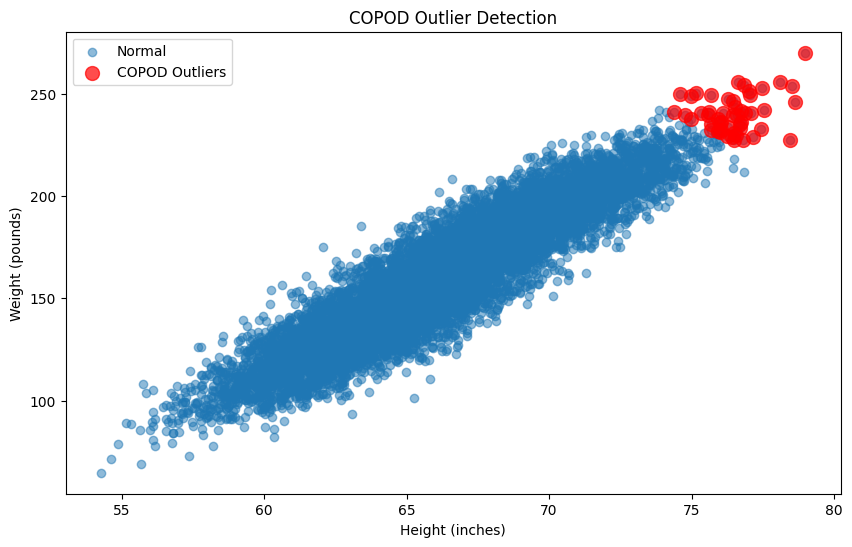

In [31]:
# Visualize the outliers
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(copod_outliers['Height'], copod_outliers['Weight'], 
           color='red', s=100, alpha=0.7, label='COPOD Outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('COPOD Outlier Detection')
plt.legend()
plt.show()

## Additional Probabilistic Methods: ECOD

In this section, we explore **ECOD** as another probabilistic approach. Compare its results with COPOD to see how the independence assumption affects anomaly detection on our weight-height data!

In [32]:
from pyod.models.ecod import ECOD

# Initialize and fit the ECOD model
ecod = ECOD(contamination=0.005)
ecod.fit(wh[['Height', 'Weight']])

# Predict outliers
ecod_pred = pd.Series(ecod.predict(wh[['Height', 'Weight']]), 
                     index=wh.index)
print('Number of ECOD outliers = ', ecod_pred.sum())

# extract the outlier values from ecod_pred
ecod_outliers = ecod_pred[ecod_pred == 1]
ecod_outliers = wh.loc[ecod_outliers.index]
print(ecod_outliers)

Number of ECOD outliers =  50
      Gender     Height      Weight
190     Male  76.709835  235.035419
912     Male  77.160801  228.707301
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
1506    Male  75.698618  249.565628
1568    Male  76.456578  239.581389
1610    Male  76.617546  255.863326
1896    Male  76.472880  246.232321
1922    Male  77.446620  232.651079
1954    Male  76.116675  240.638103
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2971    Male  75.156879  250.317151
3228    Male  76.268668  247.386741
3285    Male  78.528210  253.889004
3669    Male  77.008336  251.425051
3757    Male  78.621374  245.733783
3816    Male  76.719985  236.146730
3909    Male  77.067355  249.110242
3918    Male  76.537161  243.267497
4275    Male  76.866855  240.536797
4297    Male  77.100872  240.455352
4331    Male  76.848761  254.209073
4400    Male  76.600183  239.697207
4569    Male  77.547186  242.041173
4701    Male  76.732446  241.68660

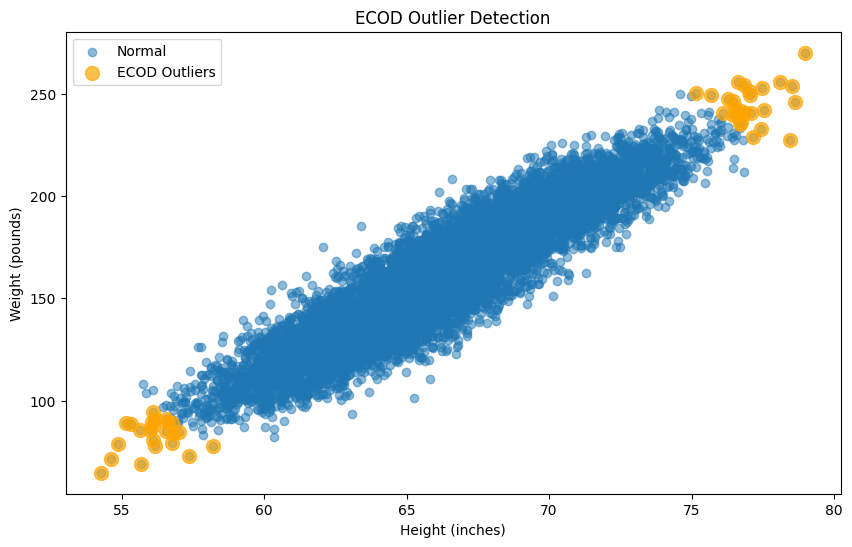

In [33]:
# Visualize ECOD outliers
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(ecod_outliers['Height'], ecod_outliers['Weight'], 
           color='orange', s=100, alpha=0.7, label='ECOD Outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('ECOD Outlier Detection')
plt.legend()
plt.show()

# Detecting Outliers Using Kernel-Based Algorithms (PyOD)

## What are Kernel-Based Methods?

Kernel-based algorithms use **kernel functions** to transform data into higher-dimensional spaces where separation between normal and anomalous points becomes easier.

**Core Concept**:
- Data that's **not linearly separable** in the original space...
- ...might be **separable in a transformed (kernel) space**
- Use the **"kernel trick"** to work in high dimensions without explicitly computing the transformation

---

## Algorithm: One-Class SVM (OCSVM)

### How One-Class SVM Works

Unlike traditional SVM (which learns a boundary between two classes), **One-Class SVM** learns a boundary around **one class** (normal data):

1. **Map to Feature Space**:
   - Use a kernel function (RBF, linear, polynomial, sigmoid) to implicitly transform data
   - In this new space, find a **hyperplane** that separates normal data from the origin

2. **Learn the Decision Boundary**:
   - Fit a hyperplane that **encloses most normal points**
   - Points are allowed to fall outside based on the `nu` parameter
   - The hyperplane maximizes margin while allowing some flexibility

3. **Classify New Points**:
   - Points **inside the boundary** → normal
   - Points **outside the boundary** → anomalies

### Key Hyperparameters

1. **`kernel`**: The kernel function to use
   - **'rbf' (Radial Basis Function)**: Most popular, handles non-linear patterns
     - Creates smooth, circular decision boundaries
   - **'linear'**: Fastest, for linearly separable data
   - **'poly'**: Polynomial boundaries, can overfit
   - **'sigmoid'**: Neural network-like transformation

2. **`gamma`**: Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
   - **'auto'**: Uses 1 / n_features
   - **High gamma**: Model focuses on nearby points (complex, can overfit)
   - **Low gamma**: Model considers distant points (simpler, smoother boundary)

3. **`nu`**: Upper bound on fraction of outliers and lower bound on fraction of support vectors
   - Similar to contamination, but interpreted differently
   - Range: (0, 1), typically 0.5
   - Higher nu → more flexible boundary, more points classified as outliers

### The Importance of Scaling

⚠️ **Critical**: OCSVM is **sensitive to feature scales**!

- Features with large ranges dominate the distance calculations
- **Always standardize/normalize** features before applying OCSVM
- Use `StandardScaler` or PyOD's `standardizer` utility

### When to Use OCSVM

- ✅ Data has **complex, non-linear patterns**
- ✅ Need a **robust** decision boundary
- ✅ Have **only normal data** for training (one-class problem)
- ✅ Can afford to **scale your features** properly
- ❌ Have very large datasets (can be slow)
- ❌ Need easy interpretability (kernel methods are "black box")

### Kernel Selection Guide

- **Start with 'rbf'**: Works well in most cases
- **Try 'linear'**: If data seems linearly separable or for baseline
- **Use 'poly'**: If you suspect polynomial relationships
- **Avoid 'sigmoid'**: Unless you have specific reasons

Let's see how OCSVM performs with different kernels!

In [34]:
from pyod.models.ocsvm import OCSVM

In [35]:
ocsvm = OCSVM(contamination=0.005, 
              kernel='rbf',
              gamma='auto',
              nu=0.5)
ocsvm.fit(wh[['Height', 'Weight']])

OCSVM(cache_size=200, coef0=0.0, contamination=0.005, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [36]:
ocsvm_pred = pd.Series(ocsvm.predict(wh[['Height', 'Weight']]), 
                      index=wh.index)

/Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/deep/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


In [37]:
print('Number of OCSVM outliers = ', ocsvm_pred.sum())

Number of OCSVM outliers =  50


In [38]:
# extract the outlier values from ocsvm_pred
ocsvm_outliers = ocsvm_pred[ocsvm_pred == 1]
ocsvm_outliers = wh.loc[ocsvm_outliers.index] 
print(ocsvm_outliers)

      Gender     Height      Weight
0       Male  73.847017  241.893563
86      Male  66.596197  208.345694
727     Male  63.400423  185.188138
994     Male  78.095867  255.690835
1154    Male  73.611985  236.780537
1243    Male  62.063836  175.071171
1317    Male  78.462053  227.342565
1506    Male  75.698618  249.565628
1610    Male  76.617546  255.863326
1671    Male  70.059331  225.014368
1750    Male  74.604668  249.946283
1896    Male  76.472880  246.232321
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2623    Male  76.842679  211.724166
2971    Male  75.156879  250.317151
3228    Male  76.268668  247.386741
3285    Male  78.528210  253.889004
3657    Male  74.568732  234.809180
3669    Male  77.008336  251.425051
3757    Male  78.621374  245.733783
3909    Male  77.067355  249.110242
3918    Male  76.537161  243.267497
4077    Male  74.976953  248.848873
4170    Male  60.243718  153.831429
4331    Male  76.848761  254.209073
4569    Male  77.547186  242

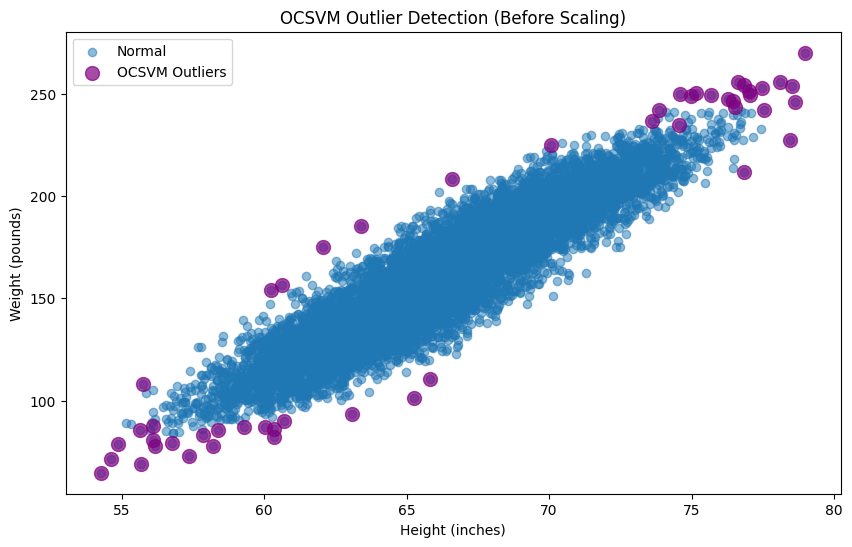

In [39]:
# Visualize OCSVM outliers
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(ocsvm_outliers['Height'], ocsvm_outliers['Weight'], 
           color='purple', s=100, alpha=0.7, label='OCSVM Outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('OCSVM Outlier Detection (Before Scaling)')
plt.legend()
plt.show()

In [40]:
from pyod.utils.utility import standardizer

ocsvm = OCSVM(contamination=0.005, 
              kernel='rbf',
              gamma='auto',
              nu=0.5)

scaled = standardizer(wh[['Height', 'Weight']])
ocsvm.fit(scaled)
ocsvm_pred_sc = pd.Series(ocsvm.predict(scaled), 
                      index=wh.index)

# extract the outlier values from ocsvm_pred_sc
ocsvm_outliers_sc = ocsvm_pred_sc[ocsvm_pred_sc == 1]
ocsvm_outliers_sc = wh.loc[ocsvm_outliers_sc.index] 
print(ocsvm_outliers_sc)

      Gender     Height      Weight
190     Male  76.709835  235.035419
912     Male  77.160801  228.707301
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
1506    Male  75.698618  249.565628
1568    Male  76.456578  239.581389
1610    Male  76.617546  255.863326
1750    Male  74.604668  249.946283
1896    Male  76.472880  246.232321
1922    Male  77.446620  232.651079
1954    Male  76.116675  240.638103
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2074    Male  75.624031  241.202330
2971    Male  75.156879  250.317151
3228    Male  76.268668  247.386741
3285    Male  78.528210  253.889004
3669    Male  77.008336  251.425051
3757    Male  78.621374  245.733783
3816    Male  76.719985  236.146730
3909    Male  77.067355  249.110242
3918    Male  76.537161  243.267497
4077    Male  74.976953  248.848873
4275    Male  76.866855  240.536797
4297    Male  77.100872  240.455352
4302    Male  76.690963  233.158692
4331    Male  76.848761  254

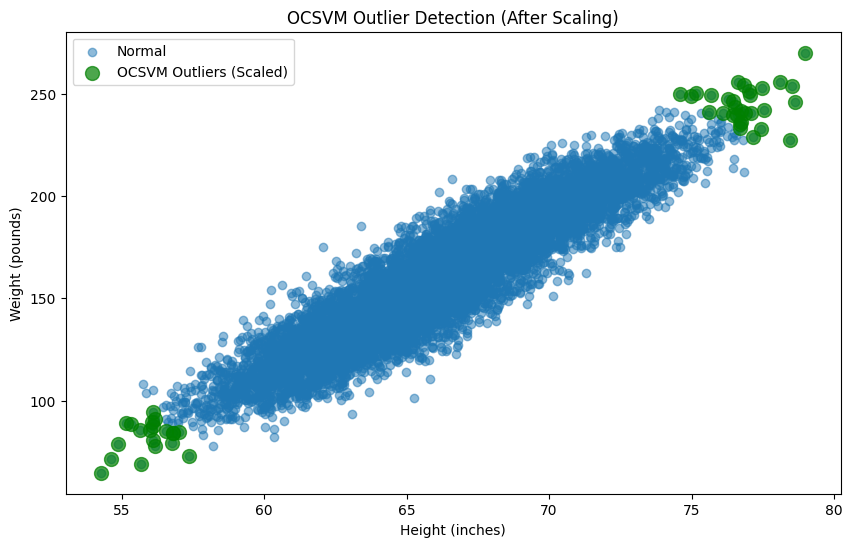

In [41]:
# Visualize OCSVM outliers after scaling
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(ocsvm_outliers_sc['Height'], ocsvm_outliers_sc['Weight'], 
           color='green', s=100, alpha=0.7, label='OCSVM Outliers (Scaled)')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('OCSVM Outlier Detection (After Scaling)')
plt.legend()
plt.show()

## Exploring Different Kernels

Different kernels can capture different types of patterns. Let's compare how 'linear', 'poly', 'rbf', and 'sigmoid' kernels detect anomalies in our weight-height data.

**Watch for**:
- Which kernel finds the most outliers?
- Which kernel produces the most stable results?
- How do the decision boundaries differ?

In [42]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    ocsvm = OCSVM(contamination=0.005, 
                  kernel=kernel)
    ocsvm.fit(scaled)
    ocsvm_pred_sc = pd.Series(ocsvm.predict(scaled), 
                              index=wh.index, 
                              name=kernel)
    ocsvm_outliers_sc = ocsvm_pred_sc[ocsvm_pred_sc == 1]
    ocsvm_outliers_sc = wh.loc[ocsvm_outliers_sc.index]
    print(f"Outliers using {kernel} kernel: \n{ocsvm_outliers_sc}")
    print(f"Number of outliers: {len(ocsvm_outliers_sc)}\n")

Outliers using linear kernel: 
     Gender     Height      Weight
190    Male  76.709835  235.035419
197    Male  75.944460  231.924749
232    Male  76.021347  235.926061
430    Male  76.027082  232.313471
741    Male  76.012300  235.437966
819    Male  76.434559  228.872991
849    Male  76.492934  227.139296
912    Male  77.160801  228.707301
994    Male  78.095867  255.690835
1317   Male  78.462053  227.342565
1328   Male  76.294184  233.503811
1506   Male  75.698618  249.565628
1533   Male  75.819040  230.939454
1568   Male  76.456578  239.581389
1610   Male  76.617546  255.863326
1696   Male  75.682808  232.104476
1750   Male  74.604668  249.946283
1858   Male  75.981174  226.474034
1896   Male  76.472880  246.232321
1922   Male  77.446620  232.651079
1954   Male  76.116675  240.638103
2014   Male  78.998742  269.989699
2070   Male  77.465569  252.556689
2074   Male  75.624031  241.202330
2138   Male  76.569274  229.858095
2318   Male  76.806344  227.220343
2326   Male  75.993360  

# Detecting Outliers Using Ensemble Methods (PyOD)

## What are Ensemble Methods?

**Ensemble methods** combine multiple models or decision strategies to improve overall performance:

**Core Principle**: "Wisdom of the crowd"
- Individual models might make mistakes
- But **combining multiple models** often produces better results
- Different models capture different aspects of anomalies

**Types of Ensembles**:
1. **Bagging**: Train multiple models on random subsets of data
2. **Boosting**: Train models sequentially, focusing on hard cases
3. **Feature bagging**: Train models on random subsets of features
4. **Model combination**: Combine different algorithm types

---

## Algorithm 1: Isolation Forest (IForest)

### How Isolation Forest Works

IForest uses a unique approach based on **isolation** rather than distance or density:

**Key Insight**: 
- **Anomalies are rare and different** → easier to isolate
- **Normal points are common and similar** → harder to isolate

### The Algorithm

1. **Build Isolation Trees** (`n_estimators` trees):
   - Randomly select a feature
   - Randomly select a split value between min and max
   - Split the data recursively
   - Stop when each point is isolated or tree reaches max depth

2. **Measure Path Length**:
   - For each point, count how many splits needed to isolate it
   - **Anomalies** → isolated quickly → **short paths**
   - **Normal points** → many splits needed → **long paths**

3. **Aggregate Across Trees**:
   - Average path length across all trees
   - Normalize to get anomaly score
   - Shorter average path = higher anomaly score

### Visual Intuition

Imagine randomly drawing lines to separate points:
- An outlier sitting far from others gets separated in 1-2 cuts ✂️
- A normal point in a dense cluster needs many cuts ✂️✂️✂️✂️✂️

### Key Hyperparameters

1. **`n_estimators`**: Number of isolation trees (default: 100)
   - More trees → more stable, but slower
   - Typical range: 50-200

2. **`contamination`**: Expected proportion of outliers

3. **`bootstrap`**: Whether to use sampling with replacement
   - `True`: Each tree trained on a bootstrapped sample (introduces more diversity)
   - `False`: Each tree sees all data (faster, but less diverse)

4. **`max_samples`**: Number of samples to draw for each tree
   - Default: 256 or size of dataset if smaller
   - Larger → more accurate but slower
   - Smaller → faster but less stable

### Why Isolation Forest is Popular

- ✅ **Fast**: Linear time complexity O(n)
- ✅ **Scalable**: Works well with large datasets
- ✅ **Few parameters**: Easy to use
- ✅ **No need for distance/density computation**: Different paradigm
- ✅ **Handles high-dimensional data** well
- ✅ **Interpretable**: Path length has intuitive meaning

### When to Use IForest

- ✅ **Large datasets** (very efficient)
- ✅ **High-dimensional data** (doesn't suffer from curse of dimensionality)
- ✅ Need **fast training and prediction**
- ✅ Want a **parameter-free** method (works well with defaults)
- ✅ Outliers are **globally anomalous** (not local anomalies)

---

## Algorithm 2: Deep Isolation Forest (DIF)

### What is DIF?

**DIF** is an advanced variant that combines:
- Isolation Forest's isolation principle
- Deep learning's representation learning

### How DIF Improves on IForest

1. **Feature Representation**:
   - Uses neural networks to learn better feature representations
   - Can capture **non-linear relationships** automatically

2. **Ensemble of Representations**:
   - Each tree uses a different learned representation
   - More diverse ensemble → better performance

### When to Use DIF

- ✅ Data has **complex, non-linear patterns**
- ✅ Have **sufficient training data** for deep learning
- ✅ Standard IForest doesn't perform well
- ❌ Need fast training (DIF is slower than IForest)
- ❌ Need interpretability (neural networks are less interpretable)

Let's apply both IForest and DIF to our taxi data!

In [43]:
from pyod.models.iforest import IForest

In [44]:
iforest = IForest(contamination=0.005,
                 n_estimators=100,
                 bootstrap=False,
                 random_state=45)
iforest.fit(wh[['Height', 'Weight']])

IForest(behaviour='old', bootstrap=False, contamination=0.005,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=45, verbose=0)

In [45]:
iforest_pred = pd.Series(iforest.predict(wh[['Height', 'Weight']]), 
                      index=wh.index)

/Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/deep/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [46]:
print('Number of IForest outliers = ', iforest_pred.sum())

Number of IForest outliers =  50


In [47]:
# extract the outlier values from iforest_pred
iforest_outliers = iforest_pred[iforest_pred == 1]
iforest_outliers = wh.loc[iforest_outliers.index] 
print(iforest_outliers)

      Gender     Height      Weight
190     Male  76.709835  235.035419
232     Male  76.021347  235.926061
741     Male  76.012300  235.437966
912     Male  77.160801  228.707301
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
1328    Male  76.294184  233.503811
1506    Male  75.698618  249.565628
1568    Male  76.456578  239.581389
1610    Male  76.617546  255.863326
1896    Male  76.472880  246.232321
1922    Male  77.446620  232.651079
1954    Male  76.116675  240.638103
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2074    Male  75.624031  241.202330
2708    Male  75.946866  237.567608
3228    Male  76.268668  247.386741
3285    Male  78.528210  253.889004
3669    Male  77.008336  251.425051
3757    Male  78.621374  245.733783
3816    Male  76.719985  236.146730
3909    Male  77.067355  249.110242
3918    Male  76.537161  243.267497
4275    Male  76.866855  240.536797
4297    Male  77.100872  240.455352
4302    Male  76.690963  233

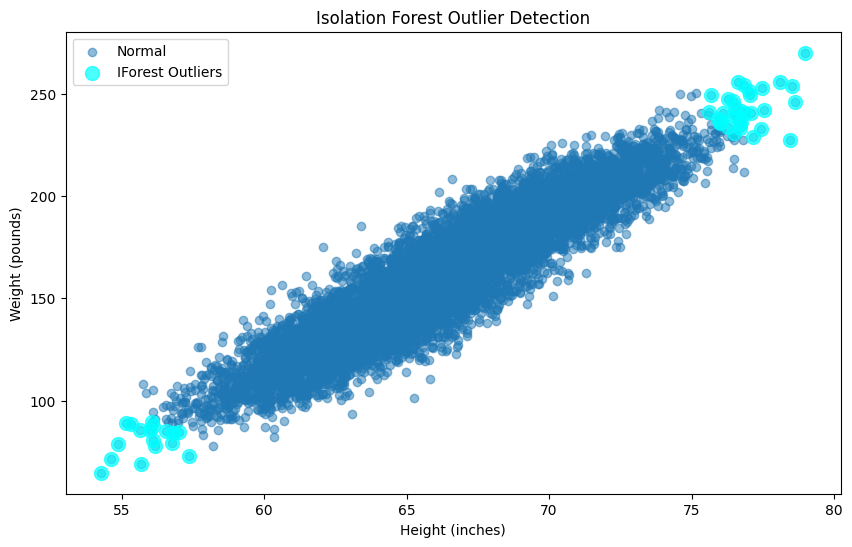

In [48]:
# Visualize IForest outliers
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(iforest_outliers['Height'], iforest_outliers['Weight'], 
           color='cyan', s=100, alpha=0.7, label='IForest Outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Isolation Forest Outlier Detection')
plt.legend()
plt.show()

In [51]:
!uv pip install torch

Using Python 3.11.13 environment at: /Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/deep
Resolved 9 packages in 680ms                                         
Resolved 9 packages in 680ms                                         
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)------------------     0 B/71.01 MiB           
⠙ Preparing packages... (0/1)--------------     0 B/71.01 MiB           
⠙ Preparing packages... (0/1)-------------- 16.00 KiB/71.01 MiB         
⠙ Preparing packages... (0/1)-------------- 32.00 KiB/71.01 MiB         
⠙ Preparing packages... (0/1)-------------- 48.00 KiB/71.01 MiB         
⠙ Preparing packages... (0/1)-------------- 63.26 KiB/71.01 MiB         
⠙ Preparing packages... (0/1)-------------- 79.26 KiB/71.01 MiB         
⠙ Preparing packages... (0/1)-------------- 16.00 KiB/71.01 MiB         
⠙ Preparing packages... (0/1)-------------- 32.00 KiB/71.01 MiB         
⠙ Preparing packages...

## Advanced Ensemble: Deep Isolation Forest (DIF)

Now let's explore DIF, which combines isolation with deep learning for potentially better anomaly detection on complex patterns in our weight-height data.

In [52]:
import pandas as pd
from pyod.models.dif import DIF
import warnings
warnings.filterwarnings('ignore')

# Initialize and fit the DIF model 
dif = DIF(contamination=0.005, n_estimators=100)
dif.fit(wh[['Height', 'Weight']])

# Get outliers
dif_scores = dif.decision_scores_
dif_threshold = np.quantile(dif_scores, 0.995)  # Adjust percentile for 0.5% contamination
dif_outliers = wh[dif_scores > dif_threshold]
print(dif_outliers)

      Gender     Height      Weight
190     Male  76.709835  235.035419
673     Male  76.501883  217.882346
819     Male  76.434559  228.872991
849     Male  76.492934  227.139296
912     Male  77.160801  228.707301
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
1922    Male  77.446620  232.651079
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2138    Male  76.569274  229.858095
2318    Male  76.806344  227.220343
2623    Male  76.842679  211.724166
3285    Male  78.528210  253.889004
3585    Male  76.453720  213.732348
3757    Male  78.621374  245.733783
3816    Male  76.719985  236.146730
3909    Male  77.067355  249.110242
4275    Male  76.866855  240.536797
4297    Male  77.100872  240.455352
4302    Male  76.690963  233.158692
4569    Male  77.547186  242.041173
5026  Female  56.547975   84.872124
5074  Female  56.159458   90.815256
5123  Female  56.445685   96.640245
5345  Female  55.336492   88.366583
5360  Female  55.668202   68

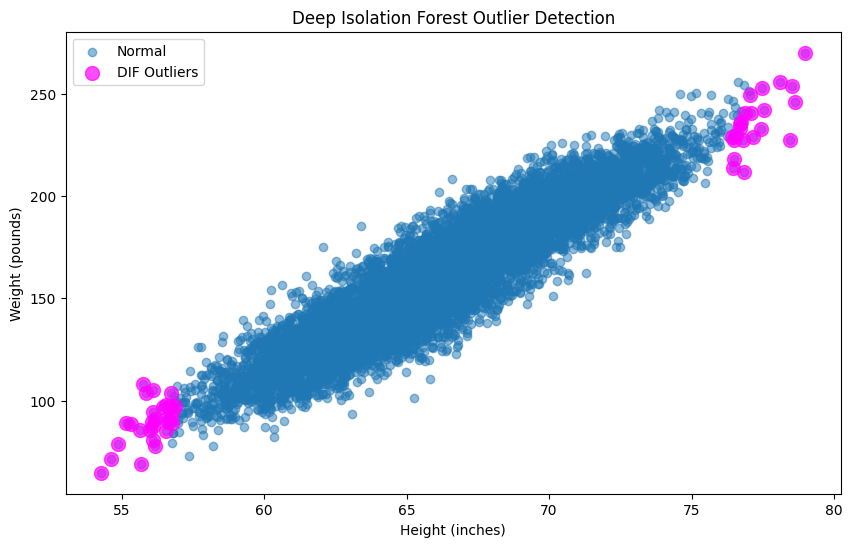

In [53]:
# Visualize DIF outliers
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(dif_outliers['Height'], dif_outliers['Weight'], 
           color='magenta', s=100, alpha=0.7, label='DIF Outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Deep Isolation Forest Outlier Detection')
plt.legend()
plt.show()

# Detecting Outliers Using Deep Learning (PyOD)

## What are Deep Learning-Based Methods?

Deep learning brings **neural networks** to anomaly detection, offering powerful capabilities:

**Core Idea**:
- Use neural networks to **learn compressed representations** of normal data
- Points that **reconstruct poorly** from these representations are anomalies
- The network learns what "normal" looks like automatically

**Advantages**:
- ✅ **Automatic feature learning**: No manual feature engineering needed
- ✅ **Handle complex patterns**: Can model highly non-linear relationships
- ✅ **Scalable**: Works with high-dimensional data
- ✅ **Flexible**: Can incorporate various architectures

**Challenges**:
- ❌ **Computationally expensive**: Requires more time and resources
- ❌ **Hyperparameter tuning**: Learning rate, epochs, batch size, architecture
- ❌ **Less interpretable**: "Black box" compared to simpler methods
- ❌ **May overfit**: Especially with small datasets

---

## Algorithm 1: AutoEncoder

### What is an AutoEncoder?

An **AutoEncoder** is a neural network trained to **reconstruct its input**:

```
Input → Encoder → Compressed Representation (Bottleneck) → Decoder → Reconstructed Output
```

### How AutoEncoders Detect Anomalies

1. **Training Phase** (on normal data):
   - **Encoder**: Compresses input to a low-dimensional representation (bottleneck)
   - **Decoder**: Reconstructs input from the compressed representation
   - **Objective**: Minimize reconstruction error for normal points
   - The network learns to **encode patterns of normal data**

2. **Detection Phase**:
   - Pass new data through the trained AutoEncoder
   - Calculate **reconstruction error** = |input - reconstructed output|
   - **Normal points**: Small reconstruction error (network learned their patterns)
   - **Anomalous points**: Large reconstruction error (network never learned these patterns)

### Architecture Components

```
Input Layer (n features)
    ↓
Hidden Layer 1 (decreasing size)
    ↓
Hidden Layer 2 (even smaller)
    ↓
Bottleneck (smallest - the compressed representation)
    ↓
Hidden Layer 3 (increasing size)
    ↓
Hidden Layer 4 (same size as input)
    ↓
Output Layer (n features - reconstruction)
```

### Key Hyperparameters

1. **`lr` (learning rate)**: How fast the network learns
   - Too high: Network doesn't converge, unstable learning
   - Too low: Training is very slow
   - Typical range: 0.001 - 0.01

2. **`epoch_num`**: Number of complete passes through the data
   - Too few: Network doesn't learn enough (underfitting)
   - Too many: Network memorizes even anomalies (overfitting)
   - Start with 10-50, increase if needed
   - Use validation to find optimal value

3. **`batch_size`**: Number of samples per training update
   - Smaller: More updates, noisier gradient, can escape local minima
   - Larger: Faster training, more stable gradient, more memory
   - Typical values: 16, 32, 64, 128

4. **Architecture** (hidden layers, neurons):
   - Deeper: Can learn more complex patterns
   - Bottleneck size: Should be much smaller than input (compression)

### Training Tips

**Underfitting Signs**:
- High reconstruction error even on normal data
- Solution: Train longer (more epochs), add capacity (more layers/neurons)

**Overfitting Signs**:
- Training error very low, but poor anomaly detection
- Network reconstructs anomalies well (memorized them)
- Solution: Early stopping, regularization, more training data

### When to Use AutoEncoders

- ✅ **High-dimensional data** (e.g., images, text, many features)
- ✅ Data has **complex, non-linear patterns**
- ✅ Have **sufficient normal training data**
- ✅ Can afford **longer training time**
- ❌ Small datasets (simpler methods might work better)
- ❌ Need fast, real-time detection without GPU
- ❌ Need interpretable results

---

## Algorithm 2: Variational AutoEncoder (VAE)

### What is a VAE?

**VAE** is a probabilistic variant of AutoEncoder:

**Key Differences**:
1. **Probabilistic encoding**: Instead of a single compressed representation, VAE learns a **distribution** (mean and variance)
2. **Regularization**: Forces the learned distribution to be close to a standard normal distribution
3. **Generative**: Can generate new samples (not just reconstruct)

### How VAE Detects Anomalies

1. **Encoder**: Maps input to a probability distribution (μ, σ)
2. **Sampling**: Sample from this distribution (with reparameterization trick)
3. **Decoder**: Reconstructs from the sample
4. **Anomaly Score**: Combination of:
   - Reconstruction error (like AutoEncoder)
   - KL divergence (how far the learned distribution is from standard normal)

### VAE vs. AutoEncoder

| Feature | AutoEncoder | VAE |
|---------|-------------|-----|
| **Output** | Deterministic | Probabilistic |
| **Regularization** | Optional | Built-in (KL divergence) |
| **Overfitting** | More prone | More robust |
| **Anomaly Score** | Reconstruction error | Reconstruction + KL |
| **Complexity** | Simpler | More complex |
| **Performance** | Good | Often better, more robust |

### When to Use VAE over AutoEncoder

- ✅ Want more **robust** anomaly detection
- ✅ Need **generative capabilities**
- ✅ Have **diverse** anomaly types
- ✅ Want built-in **regularization**

Let's apply both AutoEncoder and VAE to see how deep learning performs!

In [56]:
!uv pip install tqdm

Using Python 3.11.13 environment at: /Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/deep
Audited 1 package in 12ms


In [57]:
from pyod.models.auto_encoder import AutoEncoder

In [58]:
# lr: Learning rate for optimization
# epoch_num: Number of training iterations
# batch_size: Number of samples per training batch
auto_encoder = AutoEncoder(contamination=0.005,
                           lr=0.001,
                           epoch_num=10,
                           batch_size=32)
auto_encoder.fit(wh[['Height', 'Weight']])

Training: 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]



In [59]:
ae_predicted = pd.Series(auto_encoder.predict(wh[['Height', 'Weight']]), 
                      index=wh.index)

In [60]:
print('Number of AutoEncoder outliers = ', ae_predicted.sum())

Number of AutoEncoder outliers =  50


In [61]:
# extract the outlier values from ae_predicted
ae_outliers = ae_predicted[ae_predicted == 1]
ae_outliers = wh.loc[ae_outliers.index] 
print(ae_outliers)

      Gender     Height      Weight
190     Male  76.709835  235.035419
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
1506    Male  75.698618  249.565628
1568    Male  76.456578  239.581389
1610    Male  76.617546  255.863326
1896    Male  76.472880  246.232321
1954    Male  76.116675  240.638103
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2074    Male  75.624031  241.202330
3228    Male  76.268668  247.386741
3285    Male  78.528210  253.889004
3669    Male  77.008336  251.425051
3757    Male  78.621374  245.733783
3816    Male  76.719985  236.146730
3909    Male  77.067355  249.110242
3918    Male  76.537161  243.267497
4275    Male  76.866855  240.536797
4297    Male  77.100872  240.455352
4331    Male  76.848761  254.209073
4400    Male  76.600183  239.697207
4569    Male  77.547186  242.041173
4701    Male  76.732446  241.686601
5026  Female  56.547975   84.872124
5214  Female  56.785434   83.993077
5345  Female  55.336492   88

In [62]:
ae_scores = pd.Series(auto_encoder.decision_scores_, 
                      index=wh.index)

threshold = auto_encoder.threshold_
# or you can do it using quantile 
threshold = ae_scores.quantile(0.995)

In [63]:
ae_outliers = wh[ae_scores > ae_scores.quantile(0.995)]
print(ae_outliers)

      Gender     Height      Weight
190     Male  76.709835  235.035419
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
1506    Male  75.698618  249.565628
1568    Male  76.456578  239.581389
1610    Male  76.617546  255.863326
1896    Male  76.472880  246.232321
1954    Male  76.116675  240.638103
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2074    Male  75.624031  241.202330
3228    Male  76.268668  247.386741
3285    Male  78.528210  253.889004
3669    Male  77.008336  251.425051
3757    Male  78.621374  245.733783
3816    Male  76.719985  236.146730
3909    Male  77.067355  249.110242
3918    Male  76.537161  243.267497
4275    Male  76.866855  240.536797
4297    Male  77.100872  240.455352
4331    Male  76.848761  254.209073
4400    Male  76.600183  239.697207
4569    Male  77.547186  242.041173
4701    Male  76.732446  241.686601
5026  Female  56.547975   84.872124
5214  Female  56.785434   83.993077
5345  Female  55.336492   88

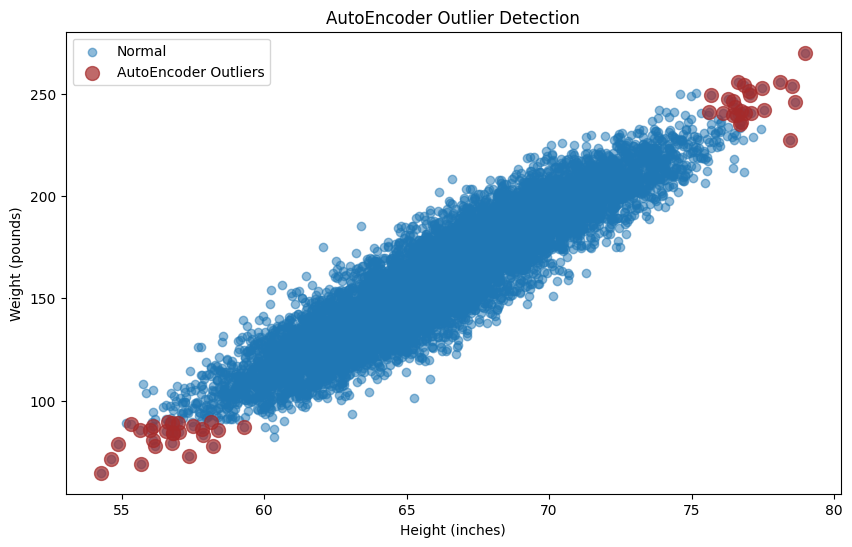

In [64]:
# Visualize AutoEncoder outliers
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(ae_outliers['Height'], ae_outliers['Weight'], 
           color='brown', s=100, alpha=0.7, label='AutoEncoder Outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('AutoEncoder Outlier Detection')
plt.legend()
plt.show()

In [65]:
%%time
auto_encoder = AutoEncoder(contamination=0.005,
                           lr=0.001,
                           epoch_num=100,
                           batch_size=32)
auto_encoder.fit(wh[['Height', 'Weight']])
ae_predicted = pd.Series(auto_encoder.predict(wh[['Height', 'Weight']]), 
                      index=wh.index)
# extract the outlier values from ae_predicted
ae_outliers = ae_predicted[ae_predicted == 1]
ae_outliers = wh.loc[ae_outliers.index] 
print(ae_outliers)

Training: 100%|██████████| 100/100 [01:11<00:00,  1.40it/s]



      Gender     Height      Weight
0       Male  73.847017  241.893563
190     Male  76.709835  235.035419
232     Male  76.021347  235.926061
430     Male  76.027082  232.313471
673     Male  76.501883  217.882346
741     Male  76.012300  235.437966
819     Male  76.434559  228.872991
849     Male  76.492934  227.139296
912     Male  77.160801  228.707301
994     Male  78.095867  255.690835
1317    Male  78.462053  227.342565
1328    Male  76.294184  233.503811
1506    Male  75.698618  249.565628
1568    Male  76.456578  239.581389
1610    Male  76.617546  255.863326
1750    Male  74.604668  249.946283
1896    Male  76.472880  246.232321
1922    Male  77.446620  232.651079
1954    Male  76.116675  240.638103
2014    Male  78.998742  269.989699
2070    Male  77.465569  252.556689
2074    Male  75.624031  241.202330
2138    Male  76.569274  229.858095
2318    Male  76.806344  227.220343
2623    Male  76.842679  211.724166
2708    Male  75.946866  237.567608
2971    Male  75.156879  250

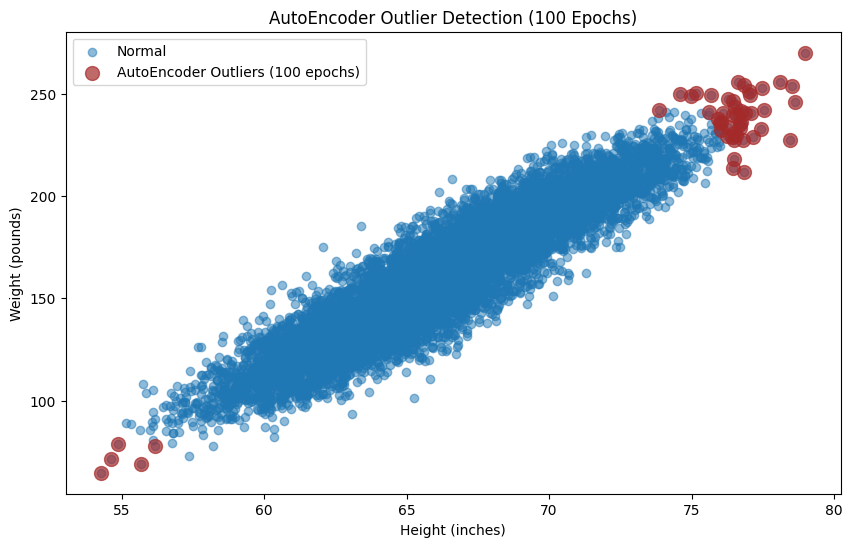

In [66]:
# Visualize AutoEncoder outliers with more epochs
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(ae_outliers['Height'], ae_outliers['Weight'], 
           color='brown', s=100, alpha=0.7, label='AutoEncoder Outliers (100 epochs)')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('AutoEncoder Outlier Detection (100 Epochs)')
plt.legend()
plt.show()

## Advanced Deep Learning: Variational AutoEncoder (VAE)

Now let's explore **VAE**, a more sophisticated variant that often provides more robust anomaly detection through its probabilistic approach.

**Watch for**:
- Does VAE find different anomalies than the standard AutoEncoder?
- How does the probabilistic approach affect the results?
- Which deep learning method works better for our weight-height data?

In [67]:
from pyod.models.vae import VAE

# lr: Learning rate for optimization
# epoch_num: Number of training iterations
# batch_size: Number of samples per training batch
vae = VAE(contamination=0.005,
          lr=0.001,
          epoch_num=100,
          batch_size=32)
vae.fit(wh[['Height', 'Weight']])

vae_predicted = pd.Series(vae.predict(wh[['Height', 'Weight']]), 
                      index=wh.index)
# extract the outlier values from vae_predicted
vae_outliers = vae_predicted[vae_predicted == 1]
vae_outliers = wh.loc[vae_outliers.index] 
print(vae_outliers)

Training: 100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


      Gender     Height      Weight
2014    Male  78.998742  269.989699
5026  Female  56.547975   84.872124
5074  Female  56.159458   90.815256
5122  Female  57.103869   93.506316
5123  Female  56.445685   96.640245
5182  Female  57.313903   95.139047
5214  Female  56.785434   83.993077
5345  Female  55.336492   88.366583
5360  Female  55.668202   68.982530
5462  Female  57.313024   93.876437
5732  Female  56.078700   94.488374
5740  Female  56.108902   80.531259
5925  Female  57.481392   87.496571
5958  Female  56.757604   88.884853
6047  Female  56.630412   89.480480
6176  Female  55.851214  103.767137
6230  Female  56.856082   97.364978
6360  Female  57.800769   86.190960
6367  Female  58.387272   85.793085
6620  Female  56.678140   97.269967
6624  Female  54.616858   71.393749
6625  Female  55.739737  108.121969
6670  Female  56.975133   89.169850
6707  Female  56.789386   95.328088
6834  Female  56.066636   89.571205
6908  Female  56.098246  104.954100
6982  Female  56.764456   79

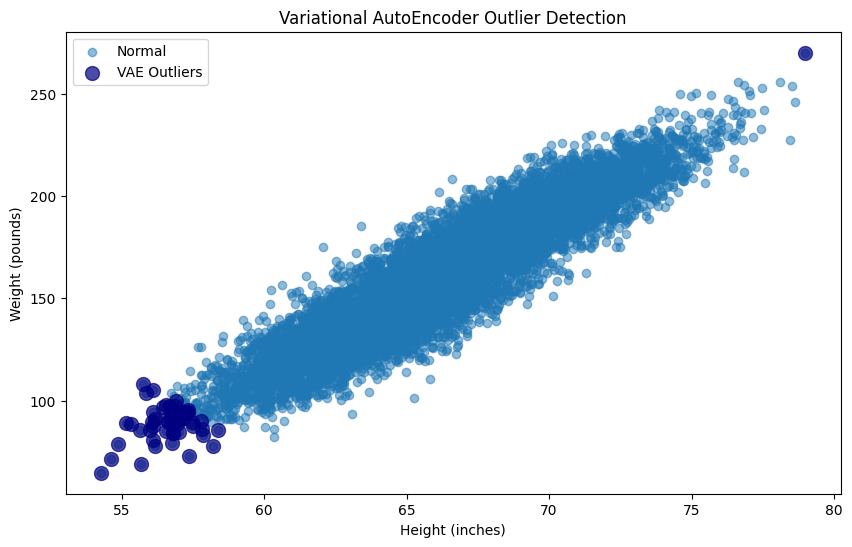

In [68]:
# Visualize VAE outliers
plt.figure(figsize=(10, 6))
plt.scatter(wh['Height'], wh['Weight'], alpha=0.5, label='Normal')
plt.scatter(vae_outliers['Height'], vae_outliers['Weight'], 
           color='navy', s=100, alpha=0.7, label='VAE Outliers')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Variational AutoEncoder Outlier Detection')
plt.legend()
plt.show()

# Summary and Key Takeaways

## Algorithms We Explored

Throughout this lab, we explored **8+ different anomaly detection algorithms** across multiple families, demonstrating that **PyOD works on any tabular data, not just time series**:

### 1. **Distance-Based Algorithms**
- **KNN (K-Nearest Neighbors)**: Uses average/median/max distance to k neighbors
  - Simple, interpretable, but computationally expensive
  - Works well when outliers are far from normal points

- **LOF (Local Outlier Factor)**: Uses local density comparison
  - Better than KNN for data with varying density
  - Detects local anomalies within clusters

### 2. **Clustering-Based Algorithms**
- **CBLOF (Cluster-Based Local Outlier Factor)**: Clusters first, then scores
  - Efficient for large datasets
  - Works well when data has natural groupings
  - Points in small clusters or far from clusters are anomalies

### 3. **Probabilistic/Statistical Algorithms**
- **COPOD (Copula-Based Outlier Detection)**: Uses copula theory
  - Parameter-free (except contamination)
  - Fast, handles feature dependencies
  - Based on tail probabilities

- **ECOD (Empirical Cumulative Outlier Detection)**: Simpler than COPOD
  - Even faster, assumes feature independence
  - Good baseline method

### 4. **Kernel-Based Algorithms**
- **OCSVM (One-Class SVM)**: Learns decision boundary using kernels
  - Handles non-linear patterns through kernel trick
  - Requires feature scaling
  - Multiple kernel options (rbf, linear, poly, sigmoid)

### 5. **Ensemble Methods**
- **Isolation Forest**: Uses isolation trees to detect outliers
  - Very fast and scalable
  - Works well with high-dimensional data
  - Based on "ease of isolation" principle

- **DIF (Deep Isolation Forest)**: Combines isolation with deep learning
  - More sophisticated than IForest
  - Can learn better representations

### 6. **Deep Learning Methods**
- **AutoEncoder**: Neural network that learns to reconstruct normal data
  - Detects anomalies through reconstruction error
  - Good for complex, high-dimensional patterns
  - Requires tuning (learning rate, epochs, batch size)

- **VAE (Variational AutoEncoder)**: Probabilistic variant of AutoEncoder
  - More robust than standard AutoEncoder
  - Uses both reconstruction error and KL divergence
  - Better regularization through probabilistic approach

---

## Key Insight: PyOD Works on Non-Time Series Data

This notebook demonstrates that **PyOD algorithms are versatile** and can be applied to:
- ✅ **Time series data** (as shown in other notebooks)
- ✅ **Cross-sectional data** (as shown here with weight-height)
- ✅ **Any tabular data** with numeric features
- ✅ **High-dimensional data** (images, sensors, etc.)

The key is understanding the **data characteristics** and choosing the appropriate algorithm, not whether it's time series or not.

---

## Choosing the Right Algorithm for Non-Time Series Data

| Scenario | Recommended Algorithm |
|----------|----------------------|
| **Large dataset, need speed** | Isolation Forest, COPOD, ECOD |
| **Small dataset** | KNN, LOF, OCSVM |
| **High-dimensional data** | Isolation Forest, AutoEncoder, VAE |
| **Complex non-linear patterns** | OCSVM (RBF), AutoEncoder, VAE |
| **Varying density clusters** | LOF, CBLOF |
| **Need interpretability** | KNN, Isolation Forest |
| **Parameter-free method** | COPOD, ECOD |
| **Bivariate relationships** | Visualize with scatter plots + any algorithm |

---

## PyOD Workflow Best Practices

1. **Initialize** the model with hyperparameters
   ```python
   model = KNN(contamination=0.005, n_neighbors=5)
   ```

2. **Fit** the model on data
   ```python
   model.fit(X)
   ```

3. **Get predictions** (binary labels: 0=normal, 1=anomaly)
   ```python
   predictions = model.predict(X)
   ```

4. **Get decision scores** (continuous scores)
   ```python
   scores = model.decision_scores_
   # or
   scores = model.decision_function(X)
   ```

5. **Visualize results** (especially for 2D data like weight-height)
   ```python
   plt.scatter(X[:, 0], X[:, 1], c=predictions)
   ```

---

## Key Parameters

- **`contamination`**: Expected proportion of outliers (e.g., 0.005 = 0.5%)
  - Sets the threshold for classification
  - Critical parameter for all algorithms
  - Should be based on domain knowledge or exploration

- **`n_neighbors` (KNN, LOF)**: Number of neighbors to consider
  - Small k: More sensitive to local variations
  - Large k: Smoother, more global view

- **`n_clusters` (CBLOF)**: Number of clusters
  - Domain-dependent
  - Try different values and evaluate

- **`kernel`, `gamma`, `nu` (OCSVM)**: Control decision boundary
  - Start with 'rbf' kernel and 'auto' gamma
  - **Always scale features** for OCSVM!

- **`n_estimators` (IForest)**: Number of trees
  - More trees = more stable, but slower
  - 100 is usually sufficient

- **`lr`, `epoch_num`, `batch_size` (AutoEncoder, VAE)**: Training parameters
  - Require experimentation
  - Use validation to find optimal values

---

## Final Thoughts

**No single algorithm is best for all cases!**

- Start with **simple, fast methods** (COPOD, IForest)
- Try **multiple algorithms** and compare
- Consider the **specific characteristics** of your data
- **Visualize results** when possible (scatter plots for 2D data)
- Use **domain knowledge** to validate findings
- Remember: **PyOD works on any tabular data**, not just time series!

**The best approach is often**:
1. Explore your data visually
2. Try several algorithms
3. Compare their results
4. Incorporate domain knowledge
5. Iterate based on feedback

This notebook proves that the same powerful anomaly detection techniques used for time series can be effectively applied to **any dataset** where you need to identify unusual observations!